In [10]:
import cv2
import matplotlib.pyplot as plt
from skimage import color, morphology, img_as_ubyte
from skimage.morphology import reconstruction, disk
from skimage.filters import threshold_otsu

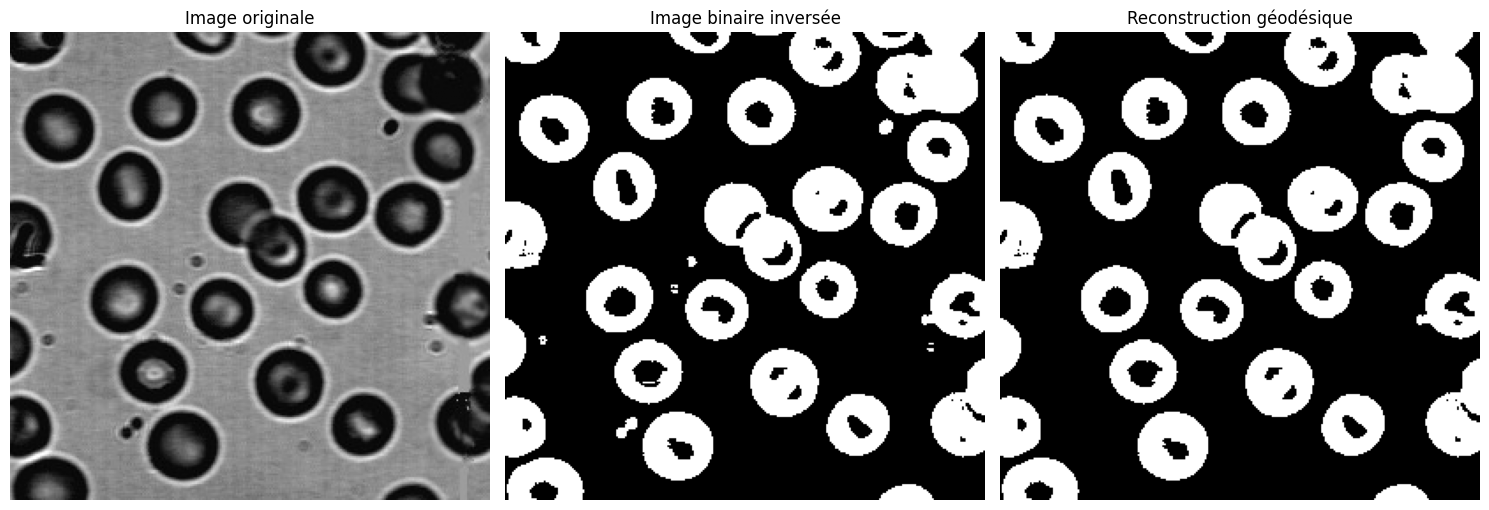

In [22]:
image = cv2.imread('BLOOD1.jpg', cv2.IMREAD_GRAYSCALE)
gray = img_as_ubyte(image)

thresh = threshold_otsu(gray)
binary = gray > thresh
binary = img_as_ubyte(binary)
binary = 255 - binary

selem = disk(5)
seed = morphology.erosion(binary, selem)
geo_reconstruction = reconstruction(seed, binary, method='dilation')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(binary, cmap='gray')
axes[1].set_title("Image binaire inversée")
axes[1].axis('off')

axes[2].imshow(geo_reconstruction, cmap='gray')
axes[2].set_title("Reconstruction géodésique")
axes[2].axis('off')

plt.tight_layout()
plt.show()


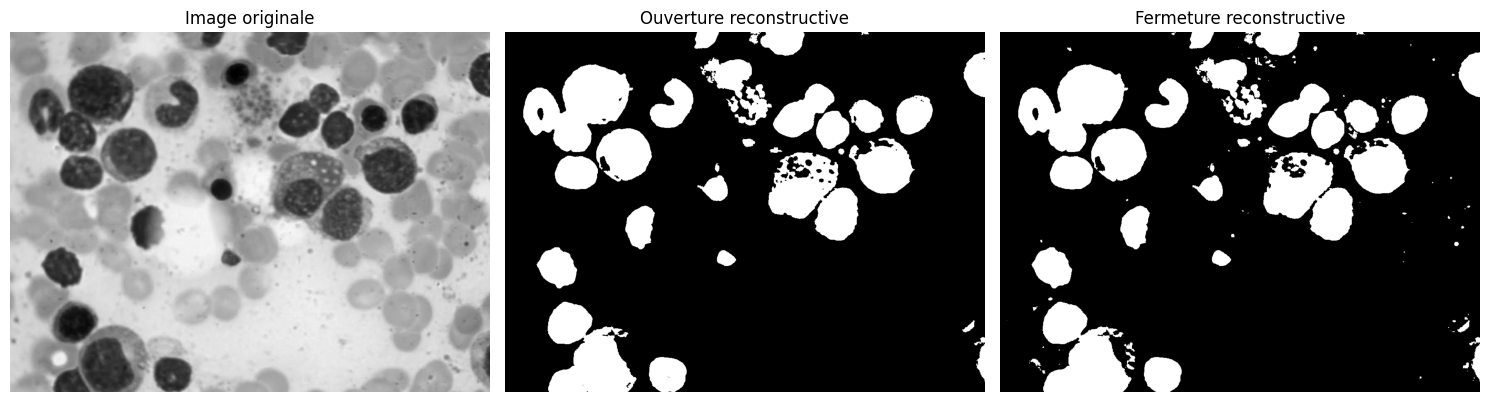

In [25]:
eroded = morphology.erosion(binary, selem)
opening_reconstructive = reconstruction(eroded, binary, method='dilation')

dilated = morphology.dilation(binary, selem)
closing_reconstructive = reconstruction(dilated, binary, method='erosion')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Image originale")
ax[0].axis('off')

ax[1].imshow(opening_reconstructive, cmap='gray')
ax[1].set_title("Ouverture reconstructive")
ax[1].axis('off')

ax[2].imshow(closing_reconstructive, cmap='gray')
ax[2].set_title("Fermeture reconstructive")
ax[2].axis('off')

plt.tight_layout()
plt.show()

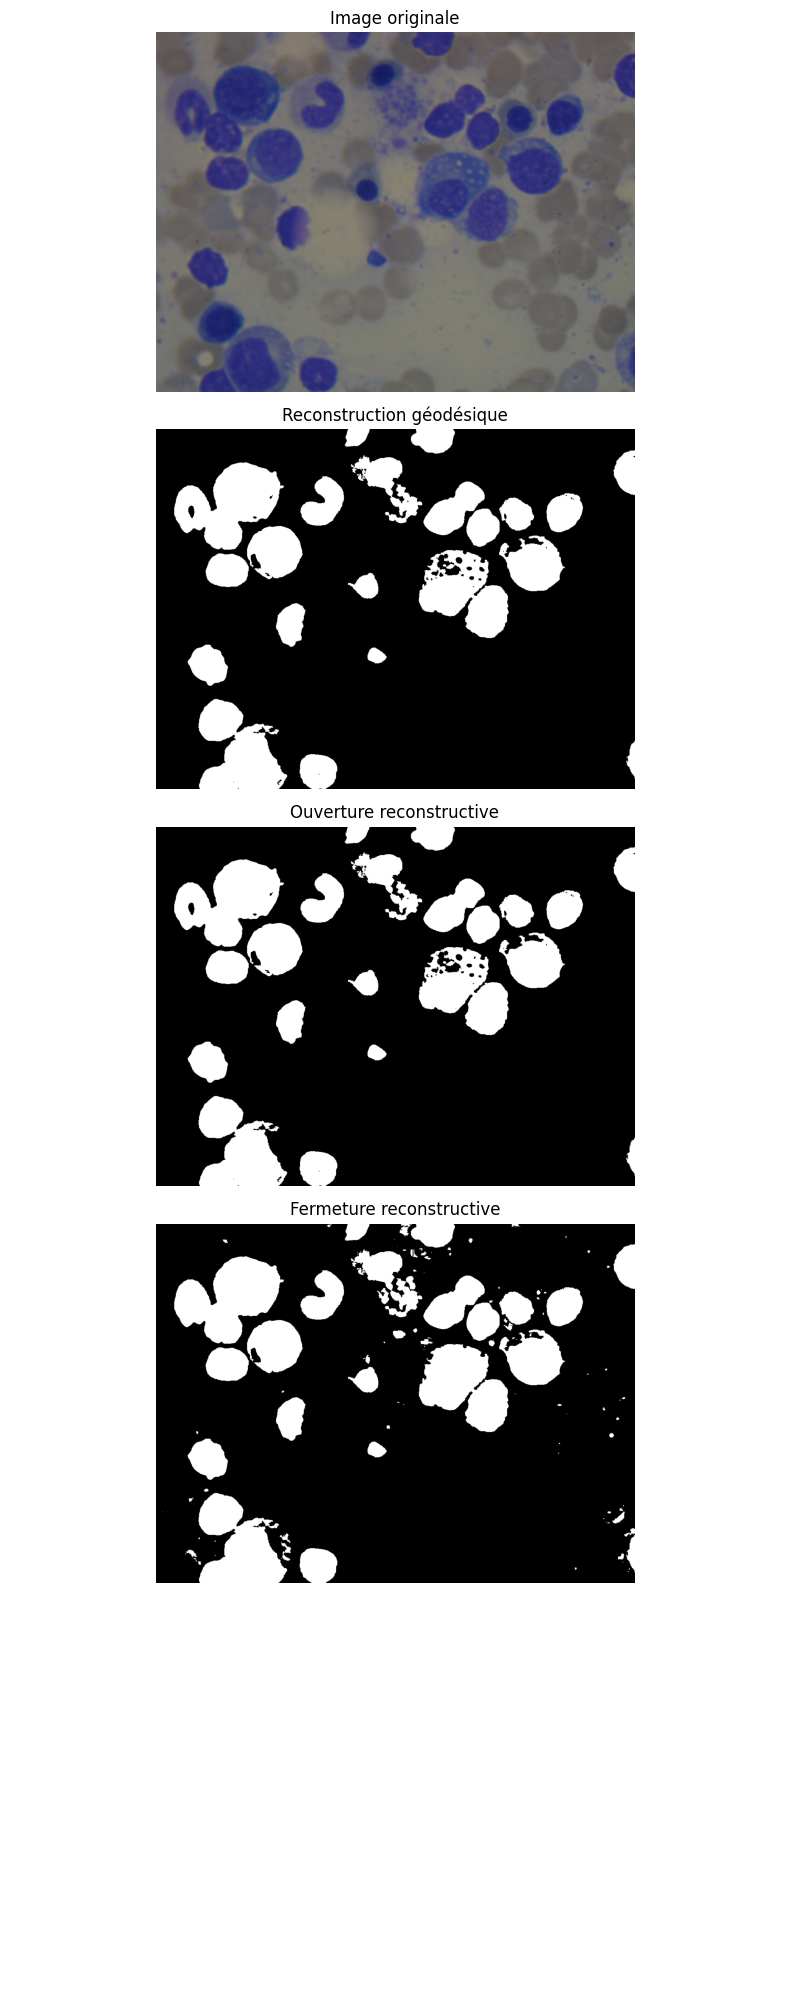

In [48]:
import cv2
import matplotlib.pyplot as plt
from skimage import color, morphology, img_as_ubyte
from skimage.morphology import reconstruction, disk
from skimage.filters import threshold_otsu

image1 = cv2.imread('MC170021.JPG')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


gray = color.rgb2gray(image1)
gray = img_as_ubyte(gray)

thresh = threshold_otsu(gray)
binary = gray > thresh
binary = img_as_ubyte(binary)

binary = 255 - binary

selem = disk(15)

seed = morphology.erosion(binary, selem)
geo_reconstruction = reconstruction(seed, binary, method='dilation')

eroded = morphology.erosion(binary, selem)
opening_reconstructive = reconstruction(eroded, binary, method='dilation')

dilated = morphology.dilation(binary, selem)
closing_reconstructive = reconstruction(dilated, binary, method='erosion')

fig, axes = plt.subplots(5, 1, figsize=(8, 20))
ax = axes.ravel()

ax[0].imshow(image1)
ax[0].set_title("Image originale")

ax[1].imshow(geo_reconstruction, cmap='gray')
ax[1].set_title("Reconstruction géodésique")

ax[2].imshow(opening_reconstructive, cmap='gray')
ax[2].set_title("Ouverture reconstructive")

ax[3].imshow(closing_reconstructive, cmap='gray')
ax[3].set_title("Fermeture reconstructive")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


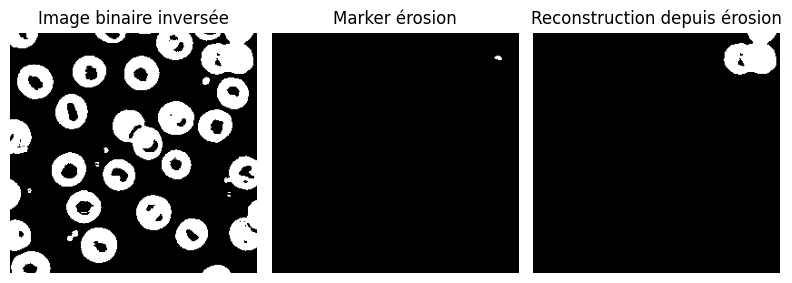

In [44]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_ubyte
from skimage.morphology import reconstruction, disk
from skimage.filters import threshold_otsu

image = cv2.imread('BLOOD1.jpg', cv2.IMREAD_GRAYSCALE)
gray = img_as_ubyte(image)

thresh = threshold_otsu(gray)
binary = gray > thresh
binary = img_as_ubyte(binary)
binary = 255 - binary

selem = disk(15)

marker_erosion = morphology.erosion(binary, selem)
marker_dilation = morphology.dilation(binary, selem)

reconstruction_from_erosion = reconstruction(marker_erosion, binary, method='dilation')
reconstruction_from_dilation = reconstruction(marker_dilation, binary, method='erosion')

fig, axes = plt.subplots(1,3, figsize=(8, 20))
ax = axes.ravel()

ax[0].imshow(binary, cmap='gray')
ax[0].set_title("Image binaire inversée")
ax[0].axis('off')

ax[1].imshow(marker_erosion, cmap='gray')
ax[1].set_title("Marker érosion")
ax[1].axis('off')

ax[2].imshow(reconstruction_from_erosion, cmap='gray')
ax[2].set_title("Reconstruction depuis érosion")
ax[2].axis('off')

plt.tight_layout()
plt.show()


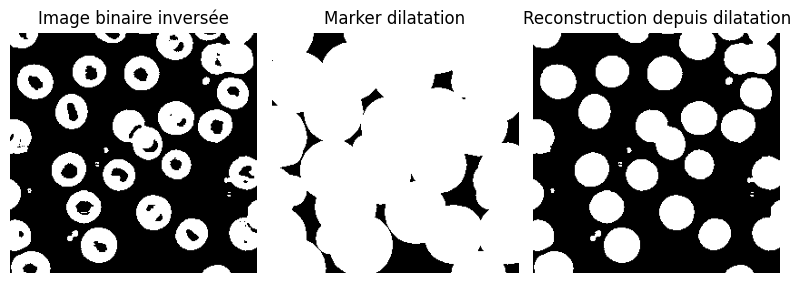

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(8, 20))
ax = axes.ravel()

ax[0].imshow(binary, cmap='gray')
ax[0].set_title("Image binaire inversée")
ax[0].axis('off')

ax[1].imshow(marker_dilation, cmap='gray')
ax[1].set_title("Marker dilatation")
ax[1].axis('off')

ax[2].imshow(reconstruction_from_dilation, cmap='gray')
ax[2].set_title("Reconstruction depuis dilatation")
ax[2].axis('off')

plt.tight_layout()
plt.show()


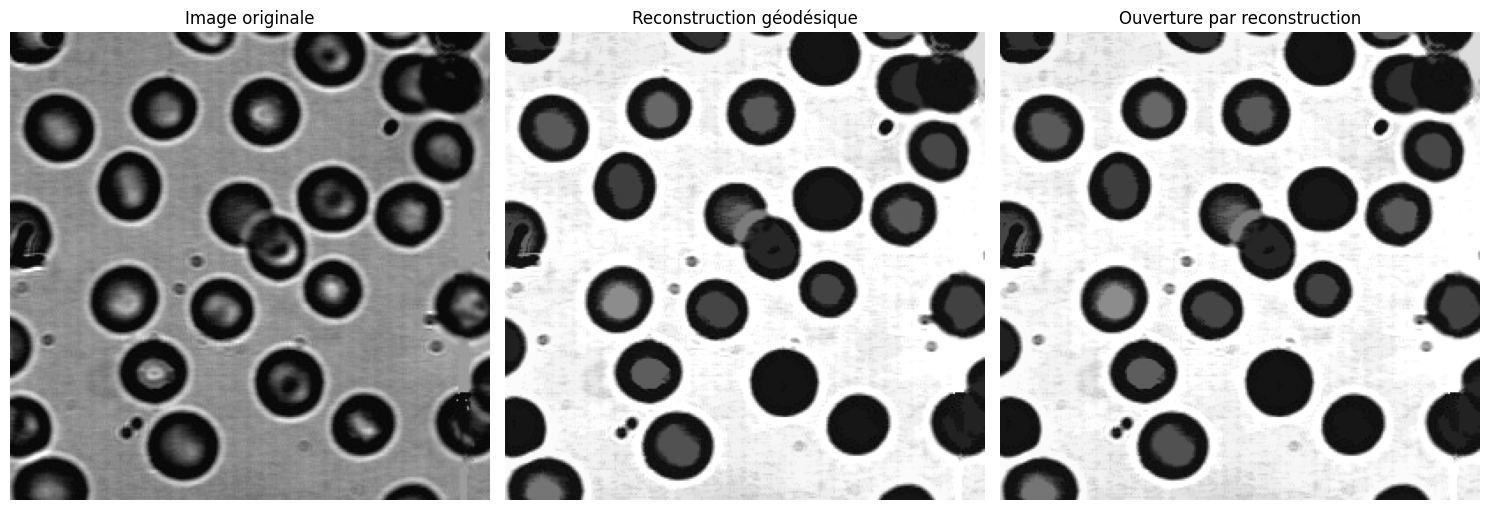

In [51]:
import cv2
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.morphology import reconstruction, erosion, disk

image = cv2.imread('BLOOD1.jpg', cv2.IMREAD_GRAYSCALE)
gray = img_as_ubyte(image)

selem = disk(8)

seed = erosion(gray, selem)
geo_reconstruction = reconstruction(seed, gray, method='dilation')

eroded = erosion(gray, selem)
opening_reconstructive = reconstruction(eroded, gray, method='dilation')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Image originale")
ax[0].axis('off')

ax[1].imshow(geo_reconstruction, cmap='gray')
ax[1].set_title("Reconstruction géodésique")
ax[1].axis('off')

ax[2].imshow(opening_reconstructive, cmap='gray')
ax[2].set_title("Ouverture par reconstruction")
ax[2].axis('off')

plt.tight_layout()
plt.show()
